# Random Forest : Identification de l'espece

In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

data = pd.read_csv('data.csv')

In [9]:
display(data.head())
display(data.info())
display(len(data.espece.unique()),' espèces : ', data.espece.unique())
display(len(data.nom_maladie.unique()), ' maladies : ', data.nom_maladie.unique())

,img_path,espece,malade,nom_maladie
0,C:\Users\aissa\Desktop\Projet\Exploration\new_...,Apple,True,Apple_scab
1,C:\Users\aissa\Desktop\Projet\Exploration\new_...,Apple,True,Apple_scab
2,C:\Users\aissa\Desktop\Projet\Exploration\new_...,Apple,True,Apple_scab
3,C:\Users\aissa\Desktop\Projet\Exploration\new_...,Apple,True,Apple_scab
4,C:\Users\aissa\Desktop\Projet\Exploration\new_...,Apple,True,Apple_scab


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70295 entries, 0 to 70294
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   img_path     70295 non-null  object
 1   espece       70295 non-null  object
 2   malade       70295 non-null  bool  
 3   nom_maladie  48001 non-null  object
dtypes: bool(1), object(3)
memory usage: 1.7+ MB


None

14

' espèces : '

array(['Apple', 'Blueberry', 'Cherry_(including_sour)', 'Corn_(maize)',
       'Grape', 'Orange', 'Peach', 'Pepper,_bell', 'Potato', 'Raspberry',
       'Soybean', 'Squash', 'Strawberry', 'Tomato'], dtype=object)

21

' maladies : '

array(['Apple_scab', 'Black_rot', 'Cedar_apple_rust', nan,
       'Powdery_mildew', 'Cercospora_leaf_spot Gray_leaf_spot',
       'Common_rust_', 'Northern_Leaf_Blight', 'Esca_(Black_Measles)',
       'Leaf_blight_(Isariopsis_Leaf_Spot)',
       'Haunglongbing_(Citrus_greening)', 'Bacterial_spot',
       'Early_blight', 'Late_blight', 'Leaf_scorch', 'Leaf_Mold',
       'Septoria_leaf_spot', 'Spider_mites Two-spotted_spider_mite',
       'Target_Spot', 'Tomato_mosaic_virus',
       'Tomato_Yellow_Leaf_Curl_Virus'], dtype=object)

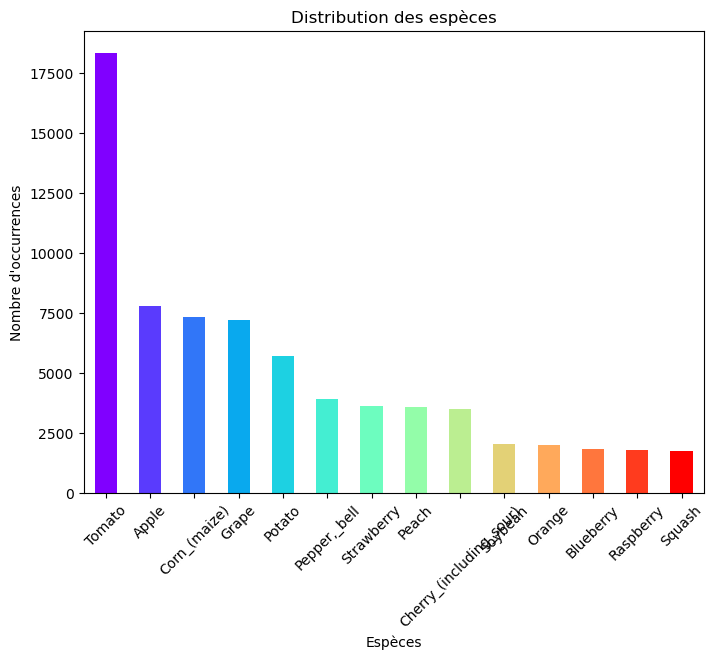

In [10]:
counts = data['espece'].value_counts()

num_colors = len(counts)
colors = plt.cm.rainbow(np.linspace(0, 1, num_colors))

plt.figure(figsize=(8, 6))
counts.plot(kind='bar', color = colors)
plt.title("Distribution des espèces")
plt.xlabel("Espèces")
plt.ylabel("Nombre d'occurrences")
plt.xticks(rotation=45)
plt.show()

# Première classification par RandomForest

In [11]:
#!pip install opencv-python

In [12]:
import cv2
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Fonction qui extrait l'histogramme des images 

def extract_features(img):
    hist = cv2.calcHist([img], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist

X = []
y = []

for img_path, label in zip(data['img_path'], data['espece']):
    img = cv2.imread(img_path)
    features = extract_features(img)  
    X.append(features)
    y.append(label)

X = np.array(X)
y = np.array(y)

In [13]:
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciation du Random Forest
rf = RandomForestClassifier(random_state=42)


In [14]:
# Recherche des paramètres optimaux pour le Random Forest avec SearchCridCV

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100, 250],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy',verbose=40)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5; 1/36] START max_features=auto, min_samples_leaf=1, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 1/36] END max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.943 total time=   5.6s
[CV 2/5; 1/36] START max_features=auto, min_samples_leaf=1, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 1/36] END max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.944 total time=   3.3s
[CV 3/5; 1/36] START max_features=auto, min_samples_leaf=1, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 1/36] END max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.944 total time=   3.3s
[CV 4/5; 1/36] START max_features=auto, min_samples_leaf=1, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 1/36] END max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.950 total time=   3.6s
[CV 5/5; 1/36] START max_features=auto, min_samples_leaf=1, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 1/36] END max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.942 total time=   3.1s
[CV 1/5; 2/36] START max_features=auto, min_samples_leaf=1, n_estimators=50.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 2/36] END max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.965 total time=  16.1s
[CV 2/5; 2/36] START max_features=auto, min_samples_leaf=1, n_estimators=50.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 2/36] END max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.967 total time=  15.9s
[CV 3/5; 2/36] START max_features=auto, min_samples_leaf=1, n_estimators=50.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 2/36] END max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.967 total time=  15.9s
[CV 4/5; 2/36] START max_features=auto, min_samples_leaf=1, n_estimators=50.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 2/36] END max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.972 total time=  15.8s
[CV 5/5; 2/36] START max_features=auto, min_samples_leaf=1, n_estimators=50.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 2/36] END max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.966 total time=  16.6s
[CV 1/5; 3/36] START max_features=auto, min_samples_leaf=1, n_estimators=100....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 3/36] END max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.969 total time=  32.3s
[CV 2/5; 3/36] START max_features=auto, min_samples_leaf=1, n_estimators=100....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 3/36] END max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.970 total time=  31.8s
[CV 3/5; 3/36] START max_features=auto, min_samples_leaf=1, n_estimators=100....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 3/36] END max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.970 total time=  31.9s
[CV 4/5; 3/36] START max_features=auto, min_samples_leaf=1, n_estimators=100....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 3/36] END max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.973 total time=  32.0s
[CV 5/5; 3/36] START max_features=auto, min_samples_leaf=1, n_estimators=100....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 3/36] END max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.968 total time=  31.9s
[CV 1/5; 4/36] START max_features=auto, min_samples_leaf=1, n_estimators=250....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 4/36] END max_features=auto, min_samples_leaf=1, n_estimators=250;, score=0.970 total time= 1.3min
[CV 2/5; 4/36] START max_features=auto, min_samples_leaf=1, n_estimators=250....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 4/36] END max_features=auto, min_samples_leaf=1, n_estimators=250;, score=0.972 total time= 1.3min
[CV 3/5; 4/36] START max_features=auto, min_samples_leaf=1, n_estimators=250....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 4/36] END max_features=auto, min_samples_leaf=1, n_estimators=250;, score=0.972 total time= 1.3min
[CV 4/5; 4/36] START max_features=auto, min_samples_leaf=1, n_estimators=250....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 4/36] END max_features=auto, min_samples_leaf=1, n_estimators=250;, score=0.973 total time= 1.5min
[CV 5/5; 4/36] START max_features=auto, min_samples_leaf=1, n_estimators=250....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 4/36] END max_features=auto, min_samples_leaf=1, n_estimators=250;, score=0.970 total time= 1.3min
[CV 1/5; 5/36] START max_features=auto, min_samples_leaf=3, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 5/36] END max_features=auto, min_samples_leaf=3, n_estimators=10;, score=0.936 total time=   3.0s
[CV 2/5; 5/36] START max_features=auto, min_samples_leaf=3, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 5/36] END max_features=auto, min_samples_leaf=3, n_estimators=10;, score=0.933 total time=   3.0s
[CV 3/5; 5/36] START max_features=auto, min_samples_leaf=3, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 5/36] END max_features=auto, min_samples_leaf=3, n_estimators=10;, score=0.935 total time=   3.0s
[CV 4/5; 5/36] START max_features=auto, min_samples_leaf=3, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 5/36] END max_features=auto, min_samples_leaf=3, n_estimators=10;, score=0.939 total time=   3.2s
[CV 5/5; 5/36] START max_features=auto, min_samples_leaf=3, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 5/36] END max_features=auto, min_samples_leaf=3, n_estimators=10;, score=0.933 total time=   3.0s
[CV 1/5; 6/36] START max_features=auto, min_samples_leaf=3, n_estimators=50.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 6/36] END max_features=auto, min_samples_leaf=3, n_estimators=50;, score=0.956 total time=  15.1s
[CV 2/5; 6/36] START max_features=auto, min_samples_leaf=3, n_estimators=50.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 6/36] END max_features=auto, min_samples_leaf=3, n_estimators=50;, score=0.956 total time=  14.8s
[CV 3/5; 6/36] START max_features=auto, min_samples_leaf=3, n_estimators=50.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 6/36] END max_features=auto, min_samples_leaf=3, n_estimators=50;, score=0.958 total time=  15.0s
[CV 4/5; 6/36] START max_features=auto, min_samples_leaf=3, n_estimators=50.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 6/36] END max_features=auto, min_samples_leaf=3, n_estimators=50;, score=0.962 total time=  15.0s
[CV 5/5; 6/36] START max_features=auto, min_samples_leaf=3, n_estimators=50.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 6/36] END max_features=auto, min_samples_leaf=3, n_estimators=50;, score=0.955 total time=  15.1s
[CV 1/5; 7/36] START max_features=auto, min_samples_leaf=3, n_estimators=100....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 7/36] END max_features=auto, min_samples_leaf=3, n_estimators=100;, score=0.958 total time=  30.0s
[CV 2/5; 7/36] START max_features=auto, min_samples_leaf=3, n_estimators=100....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 7/36] END max_features=auto, min_samples_leaf=3, n_estimators=100;, score=0.962 total time=  30.3s
[CV 3/5; 7/36] START max_features=auto, min_samples_leaf=3, n_estimators=100....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 7/36] END max_features=auto, min_samples_leaf=3, n_estimators=100;, score=0.961 total time=  30.1s
[CV 4/5; 7/36] START max_features=auto, min_samples_leaf=3, n_estimators=100....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 7/36] END max_features=auto, min_samples_leaf=3, n_estimators=100;, score=0.964 total time=  30.3s
[CV 5/5; 7/36] START max_features=auto, min_samples_leaf=3, n_estimators=100....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 7/36] END max_features=auto, min_samples_leaf=3, n_estimators=100;, score=0.959 total time=  30.2s
[CV 1/5; 8/36] START max_features=auto, min_samples_leaf=3, n_estimators=250....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 8/36] END max_features=auto, min_samples_leaf=3, n_estimators=250;, score=0.960 total time= 1.3min
[CV 2/5; 8/36] START max_features=auto, min_samples_leaf=3, n_estimators=250....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 8/36] END max_features=auto, min_samples_leaf=3, n_estimators=250;, score=0.963 total time= 1.3min
[CV 3/5; 8/36] START max_features=auto, min_samples_leaf=3, n_estimators=250....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 8/36] END max_features=auto, min_samples_leaf=3, n_estimators=250;, score=0.963 total time= 1.3min
[CV 4/5; 8/36] START max_features=auto, min_samples_leaf=3, n_estimators=250....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 8/36] END max_features=auto, min_samples_leaf=3, n_estimators=250;, score=0.966 total time= 1.3min
[CV 5/5; 8/36] START max_features=auto, min_samples_leaf=3, n_estimators=250....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 8/36] END max_features=auto, min_samples_leaf=3, n_estimators=250;, score=0.960 total time= 1.3min
[CV 1/5; 9/36] START max_features=auto, min_samples_leaf=5, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 9/36] END max_features=auto, min_samples_leaf=5, n_estimators=10;, score=0.919 total time=   2.8s
[CV 2/5; 9/36] START max_features=auto, min_samples_leaf=5, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 9/36] END max_features=auto, min_samples_leaf=5, n_estimators=10;, score=0.925 total time=   2.9s
[CV 3/5; 9/36] START max_features=auto, min_samples_leaf=5, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 9/36] END max_features=auto, min_samples_leaf=5, n_estimators=10;, score=0.929 total time=   2.8s
[CV 4/5; 9/36] START max_features=auto, min_samples_leaf=5, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 9/36] END max_features=auto, min_samples_leaf=5, n_estimators=10;, score=0.927 total time=   3.0s
[CV 5/5; 9/36] START max_features=auto, min_samples_leaf=5, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 9/36] END max_features=auto, min_samples_leaf=5, n_estimators=10;, score=0.926 total time=   3.1s
[CV 1/5; 10/36] START max_features=auto, min_samples_leaf=5, n_estimators=50....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 10/36] END max_features=auto, min_samples_leaf=5, n_estimators=50;, score=0.946 total time=  14.4s
[CV 2/5; 10/36] START max_features=auto, min_samples_leaf=5, n_estimators=50....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 10/36] END max_features=auto, min_samples_leaf=5, n_estimators=50;, score=0.949 total time=  14.4s
[CV 3/5; 10/36] START max_features=auto, min_samples_leaf=5, n_estimators=50....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 10/36] END max_features=auto, min_samples_leaf=5, n_estimators=50;, score=0.950 total time=  14.4s
[CV 4/5; 10/36] START max_features=auto, min_samples_leaf=5, n_estimators=50....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 10/36] END max_features=auto, min_samples_leaf=5, n_estimators=50;, score=0.953 total time=  14.6s
[CV 5/5; 10/36] START max_features=auto, min_samples_leaf=5, n_estimators=50....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 10/36] END max_features=auto, min_samples_leaf=5, n_estimators=50;, score=0.948 total time=  14.4s
[CV 1/5; 11/36] START max_features=auto, min_samples_leaf=5, n_estimators=100...


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 11/36] END max_features=auto, min_samples_leaf=5, n_estimators=100;, score=0.947 total time=  29.3s
[CV 2/5; 11/36] START max_features=auto, min_samples_leaf=5, n_estimators=100...


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 11/36] END max_features=auto, min_samples_leaf=5, n_estimators=100;, score=0.951 total time=  29.0s
[CV 3/5; 11/36] START max_features=auto, min_samples_leaf=5, n_estimators=100...


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 11/36] END max_features=auto, min_samples_leaf=5, n_estimators=100;, score=0.954 total time=  29.0s
[CV 4/5; 11/36] START max_features=auto, min_samples_leaf=5, n_estimators=100...


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 11/36] END max_features=auto, min_samples_leaf=5, n_estimators=100;, score=0.956 total time=  29.1s
[CV 5/5; 11/36] START max_features=auto, min_samples_leaf=5, n_estimators=100...


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 11/36] END max_features=auto, min_samples_leaf=5, n_estimators=100;, score=0.950 total time=  28.9s
[CV 1/5; 12/36] START max_features=auto, min_samples_leaf=5, n_estimators=250...


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 12/36] END max_features=auto, min_samples_leaf=5, n_estimators=250;, score=0.951 total time= 1.2min
[CV 2/5; 12/36] START max_features=auto, min_samples_leaf=5, n_estimators=250...


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 12/36] END max_features=auto, min_samples_leaf=5, n_estimators=250;, score=0.952 total time= 1.2min
[CV 3/5; 12/36] START max_features=auto, min_samples_leaf=5, n_estimators=250...


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 12/36] END max_features=auto, min_samples_leaf=5, n_estimators=250;, score=0.954 total time= 1.2min
[CV 4/5; 12/36] START max_features=auto, min_samples_leaf=5, n_estimators=250...


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 12/36] END max_features=auto, min_samples_leaf=5, n_estimators=250;, score=0.959 total time= 1.2min
[CV 5/5; 12/36] START max_features=auto, min_samples_leaf=5, n_estimators=250...


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 12/36] END max_features=auto, min_samples_leaf=5, n_estimators=250;, score=0.953 total time= 1.2min
[CV 1/5; 13/36] START max_features=sqrt, min_samples_leaf=1, n_estimators=10....
[CV 1/5; 13/36] END max_features=sqrt, min_samples_leaf=1, n_estimators=10;, score=0.943 total time=   3.3s
[CV 2/5; 13/36] START max_features=sqrt, min_samples_leaf=1, n_estimators=10....
[CV 2/5; 13/36] END max_features=sqrt, min_samples_leaf=1, n_estimators=10;, score=0.944 total time=   3.2s
[CV 3/5; 13/36] START max_features=sqrt, min_samples_leaf=1, n_estimators=10....
[CV 3/5; 13/36] END max_features=sqrt, min_samples_leaf=1, n_estimators=10;, score=0.944 total time=   3.1s
[CV 4/5; 13/36] START max_features=sqrt, min_samples_leaf=1, n_estimators=10....
[CV 4/5; 13/36] END max_features=sqrt, min_samples_leaf=1, n_estimators=10;, score=0.950 total time=   3.1s
[CV 5/5; 13/36] START max_features=sqrt, min_samples_leaf=1, n_estimators=10....
[CV 5/5; 13/36] END max_features=sqrt, min_samples_lea

[CV 4/5; 21/36] END max_features=sqrt, min_samples_leaf=5, n_estimators=10;, score=0.927 total time=   3.0s
[CV 5/5; 21/36] START max_features=sqrt, min_samples_leaf=5, n_estimators=10....
[CV 5/5; 21/36] END max_features=sqrt, min_samples_leaf=5, n_estimators=10;, score=0.926 total time=   2.9s
[CV 1/5; 22/36] START max_features=sqrt, min_samples_leaf=5, n_estimators=50....
[CV 1/5; 22/36] END max_features=sqrt, min_samples_leaf=5, n_estimators=50;, score=0.946 total time=  14.3s
[CV 2/5; 22/36] START max_features=sqrt, min_samples_leaf=5, n_estimators=50....
[CV 2/5; 22/36] END max_features=sqrt, min_samples_leaf=5, n_estimators=50;, score=0.949 total time=  14.2s
[CV 3/5; 22/36] START max_features=sqrt, min_samples_leaf=5, n_estimators=50....
[CV 3/5; 22/36] END max_features=sqrt, min_samples_leaf=5, n_estimators=50;, score=0.950 total time=  14.0s
[CV 4/5; 22/36] START max_features=sqrt, min_samples_leaf=5, n_estimators=50....
[CV 4/5; 22/36] END max_features=sqrt, min_samples_leaf

[CV 3/5; 30/36] END max_features=log2, min_samples_leaf=3, n_estimators=50;, score=0.939 total time=   7.1s
[CV 4/5; 30/36] START max_features=log2, min_samples_leaf=3, n_estimators=50....
[CV 4/5; 30/36] END max_features=log2, min_samples_leaf=3, n_estimators=50;, score=0.938 total time=   6.9s
[CV 5/5; 30/36] START max_features=log2, min_samples_leaf=3, n_estimators=50....
[CV 5/5; 30/36] END max_features=log2, min_samples_leaf=3, n_estimators=50;, score=0.932 total time=   7.2s
[CV 1/5; 31/36] START max_features=log2, min_samples_leaf=3, n_estimators=100...
[CV 1/5; 31/36] END max_features=log2, min_samples_leaf=3, n_estimators=100;, score=0.934 total time=  14.1s
[CV 2/5; 31/36] START max_features=log2, min_samples_leaf=3, n_estimators=100...
[CV 2/5; 31/36] END max_features=log2, min_samples_leaf=3, n_estimators=100;, score=0.938 total time=  14.0s
[CV 3/5; 31/36] START max_features=log2, min_samples_leaf=3, n_estimators=100...
[CV 3/5; 31/36] END max_features=log2, min_samples_le

C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [15]:
print("Meilleurs hyperparamètres :")
for param, value in best_params.items():
    print(f"{param}: {value}")

Meilleurs hyperparamètres :
max_features: auto
min_samples_leaf: 1
n_estimators: 250


In [16]:
# Entraînement du modèle

rf_model = grid_search.best_estimator_

rf_model.fit(X_train, y_train)

# Évaluation du modèle
accuracy = rf_model.score(X_test, y_test)
print("Accuracy:", accuracy)

C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy: 0.9758162031438936


In [17]:
from sklearn.metrics import classification_report

y_pred = rf_model.predict(X_test)

report = classification_report(y_test, y_pred)

print(report)

                         precision    recall  f1-score   support

                  Apple       0.98      0.98      0.98      1544
              Blueberry       0.97      0.98      0.97       366
Cherry_(including_sour)       0.99      0.98      0.98       678
           Corn_(maize)       0.99      1.00      1.00      1468
                  Grape       0.97      0.99      0.98      1437
                 Orange       0.99      0.92      0.95       419
                  Peach       0.99      0.88      0.93       738
           Pepper,_bell       0.99      0.95      0.97       775
                 Potato       0.98      0.98      0.98      1098
              Raspberry       0.97      0.99      0.98       393
                Soybean       0.97      0.94      0.96       390
                 Squash       1.00      0.97      0.98       357
             Strawberry       0.99      1.00      1.00       716
                 Tomato       0.95      0.99      0.97      3680

               accuracy

## Matrice de confusion

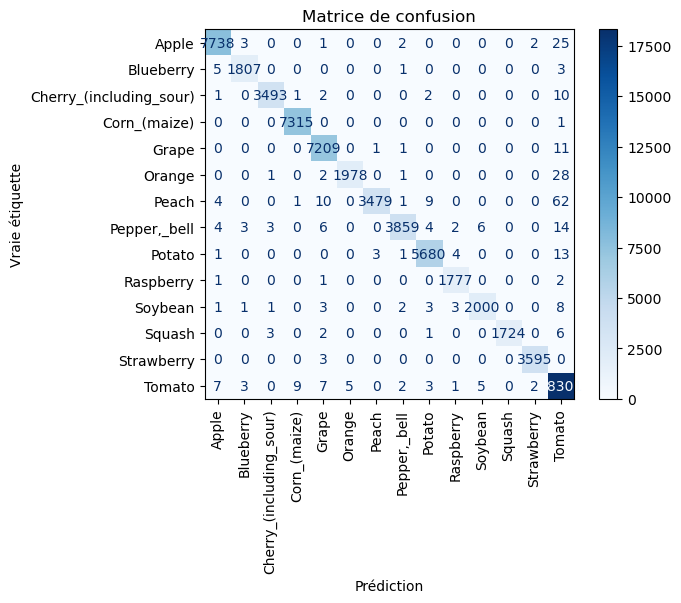

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = rf_model.predict(X)

# Calcul de la matrice de confusion
cm = confusion_matrix(y, y_pred)

labels = np.unique(y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', xticks_rotation='vertical')

plt.title('Matrice de confusion')
plt.xlabel('Prédiction')
plt.ylabel('Vraie étiquette')
plt.show()

# Avec les données normalisées par MinMax

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

rf_model_minmax = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model_minmax.fit(X_train, y_train)

accuracy = rf_model_minmax.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9758873319581762


In [20]:
y_pred = rf_model_minmax.predict(X_test)

report = classification_report(y_test, y_pred)

print(report)

                         precision    recall  f1-score   support

                  Apple       0.98      0.98      0.98      1544
              Blueberry       0.98      0.97      0.97       366
Cherry_(including_sour)       0.98      0.97      0.98       678
           Corn_(maize)       0.99      1.00      1.00      1468
                  Grape       0.98      0.99      0.98      1437
                 Orange       0.98      0.92      0.95       419
                  Peach       1.00      0.89      0.94       738
           Pepper,_bell       0.98      0.94      0.96       775
                 Potato       0.98      0.98      0.98      1098
              Raspberry       0.98      0.99      0.99       393
                Soybean       0.97      0.94      0.95       390
                 Squash       1.00      0.97      0.98       357
             Strawberry       0.99      0.99      0.99       716
                 Tomato       0.95      0.99      0.97      3680

               accuracy

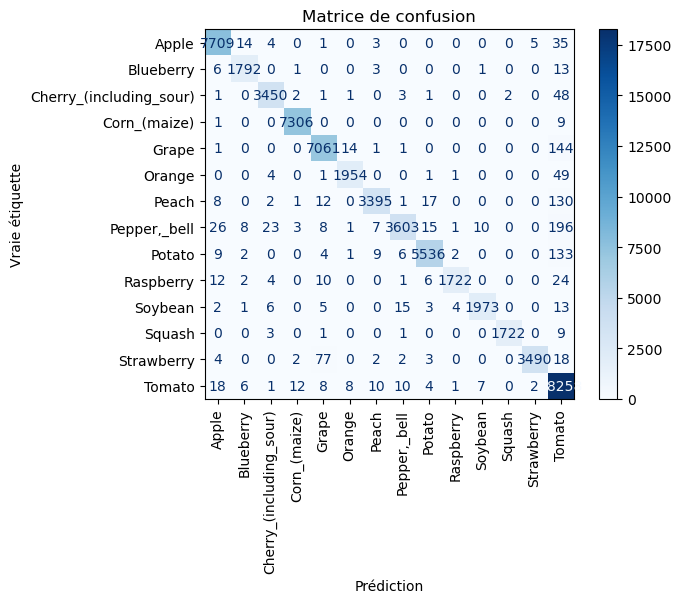

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = rf_model_minmax.predict(X)

# Calcul de la matrice de confusion
cm = confusion_matrix(y, y_pred)

labels = np.unique(y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', xticks_rotation='vertical')

plt.title('Matrice de confusion')
plt.xlabel('Prédiction')
plt.ylabel('Vraie étiquette')
plt.show()

### Sauvegarde du modèle

In [28]:
import joblib

joblib.dump(rf_model, 'rf_model_id_espece.pkl')

['rf_model_id_espece.pkl']

# Démonstration avec le meilleur modèle

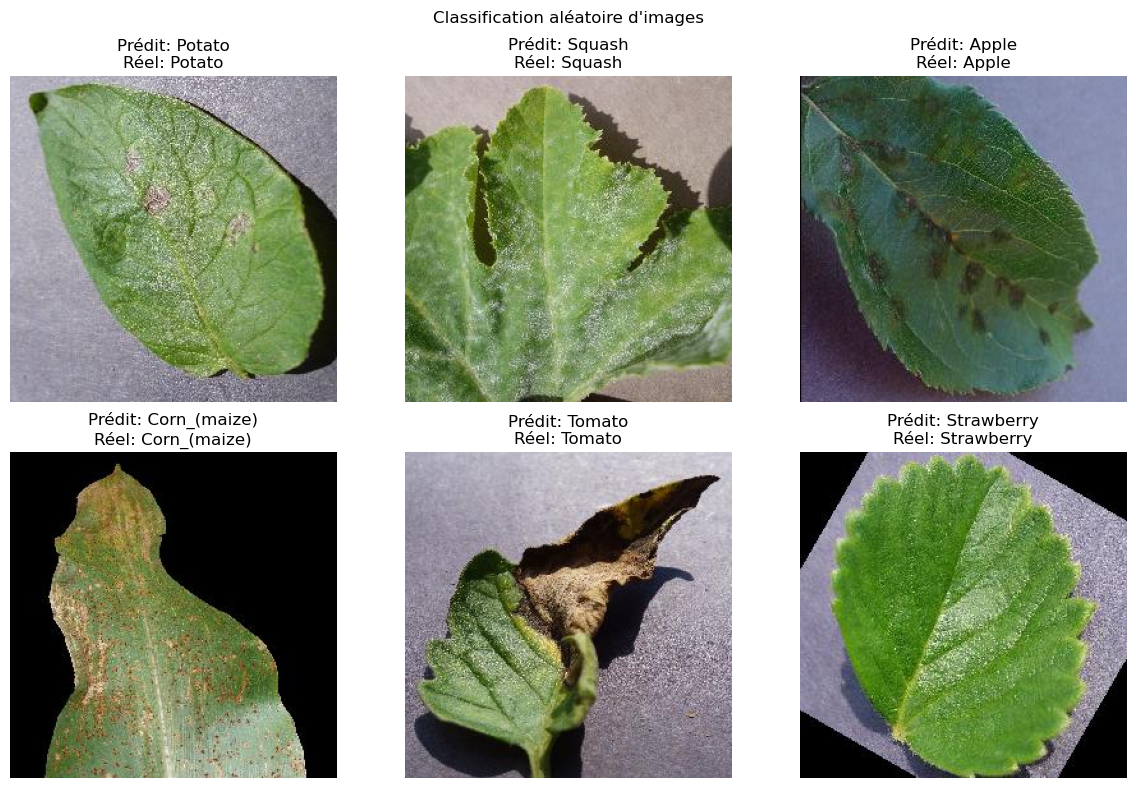

In [22]:
import random

random_indices = random.sample(range(len(data)), 6)

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle('Classification aléatoire d\'images')

for i, idx in enumerate(random_indices):
    img_path = data['img_path'][idx]
    img = cv2.imread(img_path)

    img_features = extract_features(img)

    predicted_label = rf_model.predict([img_features])[0]

    true_label = data['espece'][idx]

    row = i // 3
    col = i % 3
    axes[row, col].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[row, col].set_title(f"Prédit: {predicted_label}\nRéel: {true_label}")
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

## Performances du modèle sur les données de test

In [23]:
data_test = pd.read_csv('data_test.csv')

data_test

,img_path,espece,malade,nom_maladie
0,C:\Users\aissa\Desktop\Projet\Exploration\new_...,Apple,True,Apple_scab
1,C:\Users\aissa\Desktop\Projet\Exploration\new_...,Apple,True,Apple_scab
2,C:\Users\aissa\Desktop\Projet\Exploration\new_...,Apple,True,Apple_scab
3,C:\Users\aissa\Desktop\Projet\Exploration\new_...,Apple,True,Apple_scab
4,C:\Users\aissa\Desktop\Projet\Exploration\new_...,Apple,True,Apple_scab
...,...,...,...,...
17567,C:\Users\aissa\Desktop\Projet\Exploration\new_...,Tomato,True,Tomato_Yellow_Leaf_Curl_Virus
17568,C:\Users\aissa\Desktop\Projet\Exploration\new_...,Tomato,True,Tomato_Yellow_Leaf_Curl_Virus
17569,C:\Users\aissa\Desktop\Projet\Exploration\new_...,Tomato,True,Tomato_Yellow_Leaf_Curl_Virus
17570,C:\Users\aissa\Desktop\Projet\Exploration\new_...,Tomato,True,Tomato_Yellow_Leaf_Curl_Virus


In [24]:
X_test = []
y_test = []

for img_path, label in zip(data_test['img_path'], data_test['espece']):
    img = cv2.imread(img_path)
    features = extract_features(img)  
    X_test.append(features)
    y_test.append(label)

X_test = np.array(X_test)
y_test = np.array(y_test)

In [25]:
accuracy = rf_model.score(X_test, y_test)

accuracy

0.9742772592761211

In [26]:
import joblib

joblib.dump(rf_model_minmax, 'random_forest_id_espece.pkl')

['random_forest_id_espece.pkl']